# Projet final : Apprentissage automatique pour la science des données
### Auteurs:  Akram Farihi, Sami Abloui, Amalya Mourih 

### Objectif du projet

Ce projet a pour but de mettre en œuvre, d’évaluer et de comparer différents modèles de classification en ML en suivant un pipeline complet de data science : sélection, nettoyage, analyse, modélisation, et justification des choix.

### Jeu de données utilisé

Nous avons choisi le **GlobalCoffeeHealth dataset**, qui contient 10 000 enregistrements reflétant des comportements réels de consommation de café, de sommeil et de santé dans 20 pays.  
Ce jeu de données comprend :
- des variables démographiques (âge, genre, pays, occupation),
- la consommation quotidienne de café et de caféine,
- la durée et la qualité du sommeil,
- l’IMC, la fréquence cardiaque, le niveau de stress,
- l’activité physique, les problèmes de santé, le tabagisme et la consommation d’alcool.

Ces variables sont connues pour pouvoir faire l'étude de l’impact de la caféine sur le sommeil, le stress et la santé. 

### Variable cible et définition de problème

Pour ce projet, la variable cible est **`Sleep_Quality`** à partir de laquelle nous pourrons étudier et prédire la qualité du sommeil en fonction des habitudes de vie et des caractéristiques individuelles. 

---

Nous suivrons les étapes recommandées :  
1. **Sélection et exploration du jeu de données**  
2. **Nettoyage et prétraitement** (gestion des valeurs manquantes, sélection des variables pertinentes, traitement des déséquilibres)  
3. **Sélection des variables les plus utiles**  
4. **Entraînement et optimisation de plusieurs modèles**  
5. **Évaluation comparative des performances**  
6. **Justification des choix et sélection du meilleur modèle**

Le code, les analyses et les résultats sont présentés dans ce notebook, conformément aux livrables du projet.

## 1. Sélection et exploration du jeu de données

Pour ce projet, nous avons trouvé le jeu de données intitulé "Global Coffee Health Dataset" sur la plateforme Kaggle (disponible à l'adresse suivante : https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset). Ce jeu de données a été validé par notre professeur et, malgré sa taille relativement modeste (seulement 16 colonnes), il contient les enregistrements nécessaires et pertinents pour traiter la problématique de notre projet. Nous allons procéder à son exploration.

In [1]:
import pandas as pd


df = pd.read_csv("data\\raw\\synthetic_coffee_health_10000.csv")
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [2]:
print(f"\nDimensions: {df.shape}")
print(f"\nTypes de données:\n{df.dtypes}")


Dimensions: (10000, 16)

Types de données:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object


In [3]:
print(f"\nValeurs manquantes:\n{df.isnull().sum()}")


Valeurs manquantes:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


In [4]:
# Statistiques pour variables numériques spécifiques

num_vars = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 
            'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']


for var in num_vars:
    print(f"\n{var}:")
    print(f"  Moyenne: {df[var].mean():.2f}")
    print(f"  Médiane: {df[var].median():.2f}")
    print(f"  Écart-type: {df[var].std():.2f}")
    print(f"  Min: {df[var].min():.2f} | Max: {df[var].max():.2f}")


Age:
  Moyenne: 34.95
  Médiane: 34.00
  Écart-type: 11.16
  Min: 18.00 | Max: 80.00

Coffee_Intake:
  Moyenne: 2.51
  Médiane: 2.50
  Écart-type: 1.45
  Min: 0.00 | Max: 8.20

Caffeine_mg:
  Moyenne: 238.41
  Médiane: 235.40
  Écart-type: 137.75
  Min: 0.00 | Max: 780.30

Sleep_Hours:
  Moyenne: 6.64
  Médiane: 6.60
  Écart-type: 1.22
  Min: 3.00 | Max: 10.00

BMI:
  Moyenne: 23.99
  Médiane: 24.00
  Écart-type: 3.91
  Min: 15.00 | Max: 38.20

Heart_Rate:
  Moyenne: 70.62
  Médiane: 71.00
  Écart-type: 9.82
  Min: 50.00 | Max: 109.00

Physical_Activity_Hours:
  Moyenne: 7.49
  Médiane: 7.50
  Écart-type: 4.32
  Min: 0.00 | Max: 15.00

Smoking:
  Moyenne: 0.20
  Médiane: 0.00
  Écart-type: 0.40
  Min: 0.00 | Max: 1.00

Alcohol_Consumption:
  Moyenne: 0.30
  Médiane: 0.00
  Écart-type: 0.46
  Min: 0.00 | Max: 1.00


In [5]:
# Analyse des variables catégorielles

cat_vars = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 
            'Health_Issues', 'Occupation']


for var in cat_vars:
    print(f"\n{var}:")
    counts = df[var].value_counts()
    percentages = (counts / len(df)) * 100
    for cat, count in counts.items():
        print(f"  {cat}: {count} ({percentages[cat]:.1f}%)")


Gender:
  Female: 5001 (50.0%)
  Male: 4773 (47.7%)
  Other: 226 (2.3%)

Country:
  Canada: 543 (5.4%)
  India: 524 (5.2%)
  Norway: 523 (5.2%)
  China: 521 (5.2%)
  UK: 519 (5.2%)
  Sweden: 513 (5.1%)
  South Korea: 512 (5.1%)
  Finland: 510 (5.1%)
  Italy: 509 (5.1%)
  Switzerland: 500 (5.0%)
  France: 499 (5.0%)
  Germany: 497 (5.0%)
  Australia: 497 (5.0%)
  Belgium: 497 (5.0%)
  Netherlands: 494 (4.9%)
  Spain: 486 (4.9%)
  Mexico: 483 (4.8%)
  Japan: 469 (4.7%)
  Brazil: 456 (4.6%)
  USA: 448 (4.5%)

Sleep_Quality:
  Good: 5637 (56.4%)
  Fair: 2050 (20.5%)
  Excellent: 1352 (13.5%)
  Poor: 961 (9.6%)

Stress_Level:
  Low: 6989 (69.9%)
  Medium: 2050 (20.5%)
  High: 961 (9.6%)

Health_Issues:
  Mild: 3579 (35.8%)
  Moderate: 463 (4.6%)
  Severe: 17 (0.2%)

Occupation:
  Office: 2073 (20.7%)
  Other: 2038 (20.4%)
  Student: 1968 (19.7%)
  Healthcare: 1964 (19.6%)
  Service: 1957 (19.6%)


C:\Users\amaly\AppData\Local\Temp\ipykernel_28720\3117016910.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2, 1].boxplot(data_box, labels=['Café', 'Sommeil', 'Activité'])


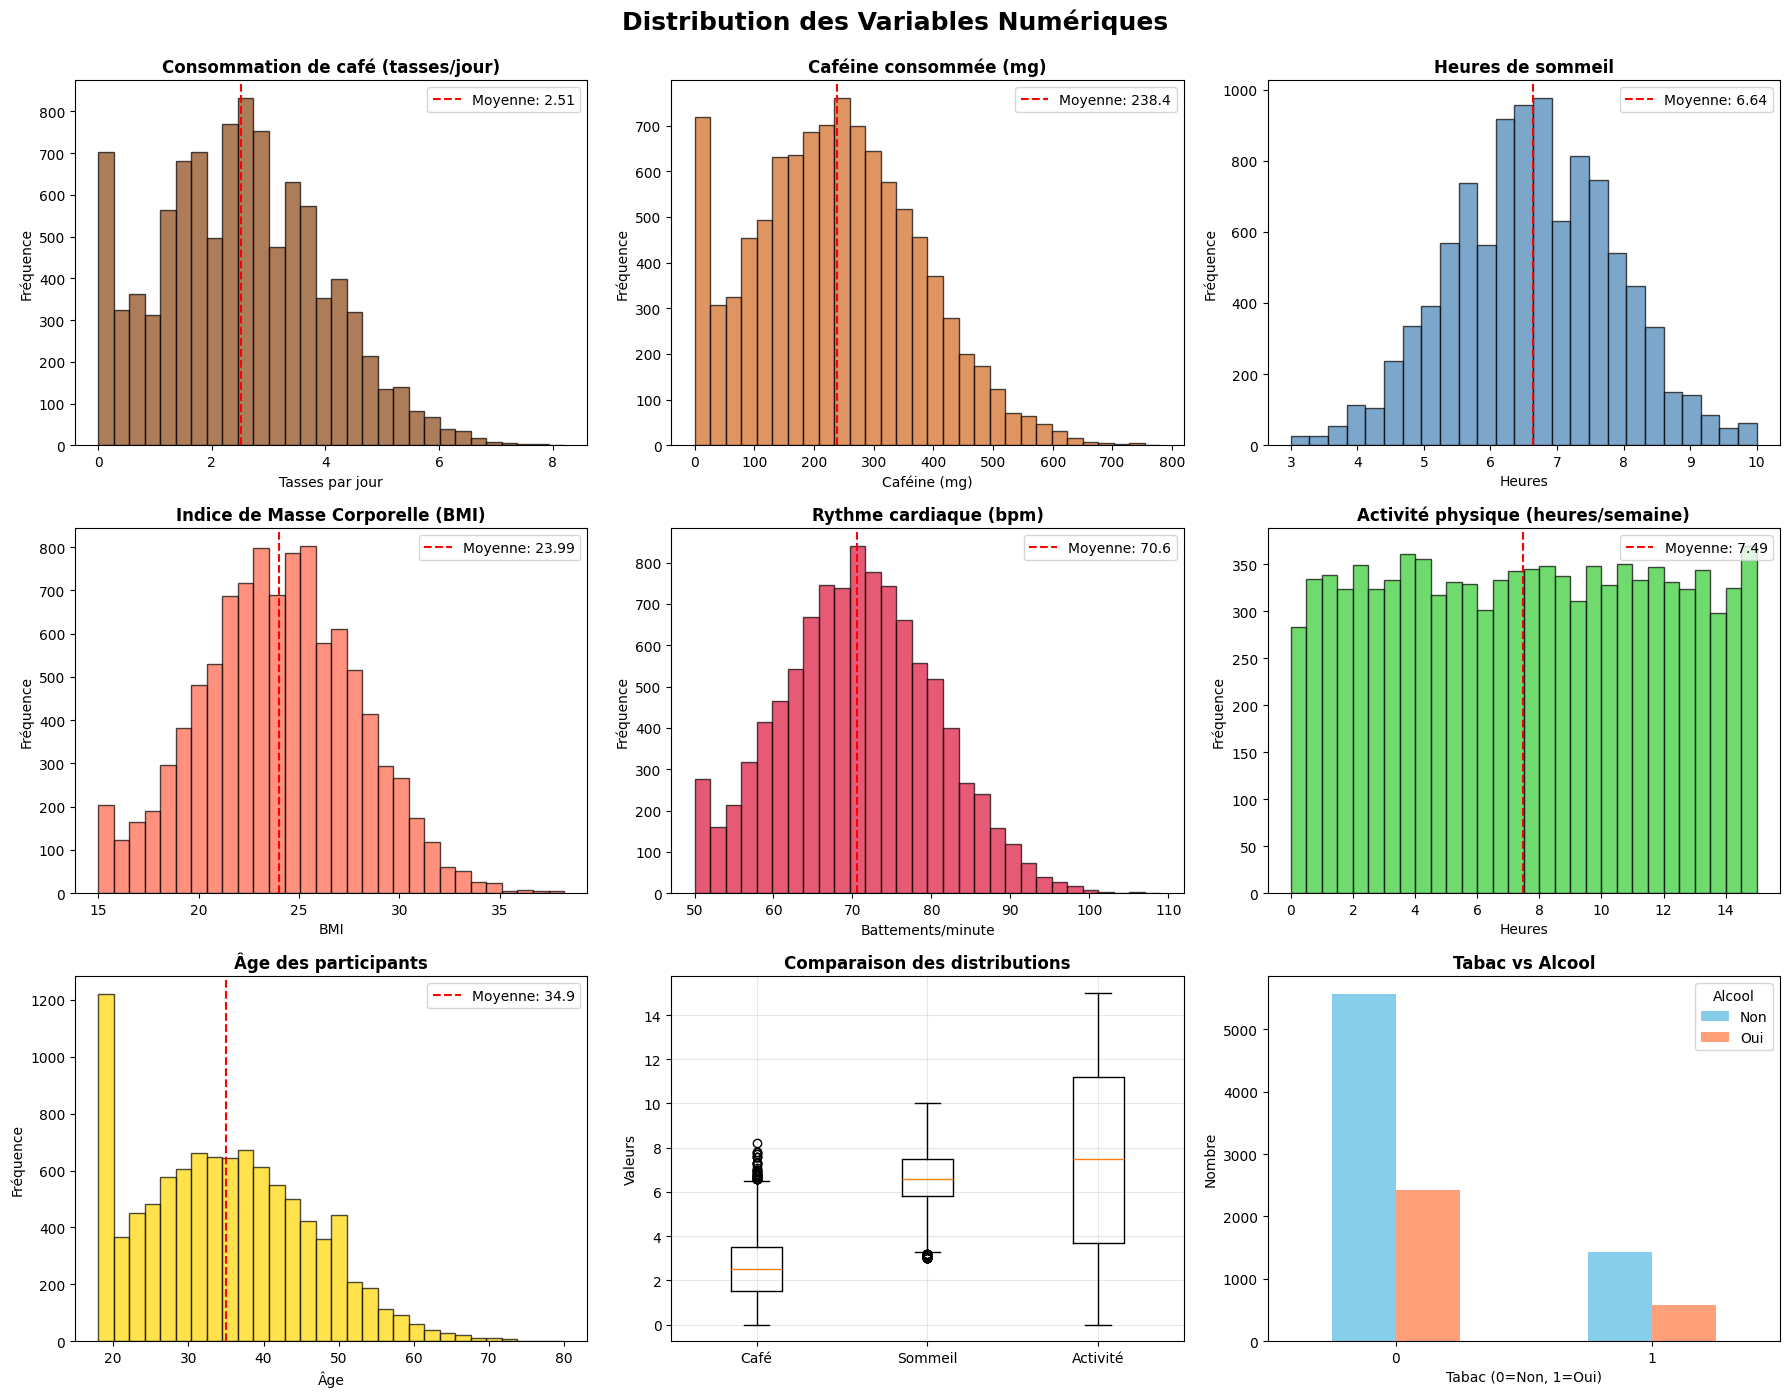

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Figure 1: Variables numériques principales

fig1, axes = plt.subplots(3, 3, figsize=(18, 14))
fig1.suptitle('Distribution des Variables Numériques', fontsize=18, fontweight='bold', y=0.995)

# Consommation de café
axes[0, 0].hist(df['Coffee_Intake'], bins=30, color='#8B4513', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Consommation de café (tasses/jour)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tasses par jour')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df['Coffee_Intake'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Coffee_Intake"].mean():.2f}')
axes[0, 0].legend()

# Caféine
axes[0, 1].hist(df['Caffeine_mg'], bins=30, color='#D2691E', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Caféine consommée (mg)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Caféine (mg)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].axvline(df['Caffeine_mg'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Caffeine_mg"].mean():.1f}')
axes[0, 1].legend()

# Heures de sommeil
axes[0, 2].hist(df['Sleep_Hours'], bins=25, color='#4682B4', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Heures de sommeil', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Heures')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].axvline(df['Sleep_Hours'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Sleep_Hours"].mean():.2f}')
axes[0, 2].legend()

# BMI
axes[1, 0].hist(df['BMI'], bins=30, color='#FF6347', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Indice de Masse Corporelle (BMI)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].axvline(df['BMI'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["BMI"].mean():.2f}')
axes[1, 0].legend()

# Rythme cardiaque
axes[1, 1].hist(df['Heart_Rate'], bins=30, color='#DC143C', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Rythme cardiaque (bpm)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Battements/minute')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].axvline(df['Heart_Rate'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Heart_Rate"].mean():.1f}')
axes[1, 1].legend()

# Activité physique
axes[1, 2].hist(df['Physical_Activity_Hours'], bins=30, color='#32CD32', edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Activité physique (heures/semaine)', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Heures')
axes[1, 2].set_ylabel('Fréquence')
axes[1, 2].axvline(df['Physical_Activity_Hours'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Physical_Activity_Hours"].mean():.2f}')
axes[1, 2].legend()

# Âge
axes[2, 0].hist(df['Age'], bins=30, color='#FFD700', edgecolor='black', alpha=0.7)
axes[2, 0].set_title('Âge des participants', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Âge')
axes[2, 0].set_ylabel('Fréquence')
axes[2, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Age"].mean():.1f}')
axes[2, 0].legend()

# Boxplot comparatif
data_box = [df['Coffee_Intake'], df['Sleep_Hours'], df['Physical_Activity_Hours']]
axes[2, 1].boxplot(data_box, labels=['Café', 'Sommeil', 'Activité'])
axes[2, 1].set_title('Comparaison des distributions', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Valeurs')
axes[2, 1].grid(True, alpha=0.3)

# Smoking vs Alcohol
smoking_alcohol = pd.crosstab(df['Smoking'], df['Alcohol_Consumption'])
smoking_alcohol.plot(kind='bar', ax=axes[2, 2], color=['#87CEEB', '#FFA07A'])
axes[2, 2].set_title('Tabac vs Alcool', fontsize=12, fontweight='bold')
axes[2, 2].set_xlabel('Tabac (0=Non, 1=Oui)')
axes[2, 2].set_ylabel('Nombre')
axes[2, 2].legend(title='Alcool', labels=['Non', 'Oui'])
axes[2, 2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

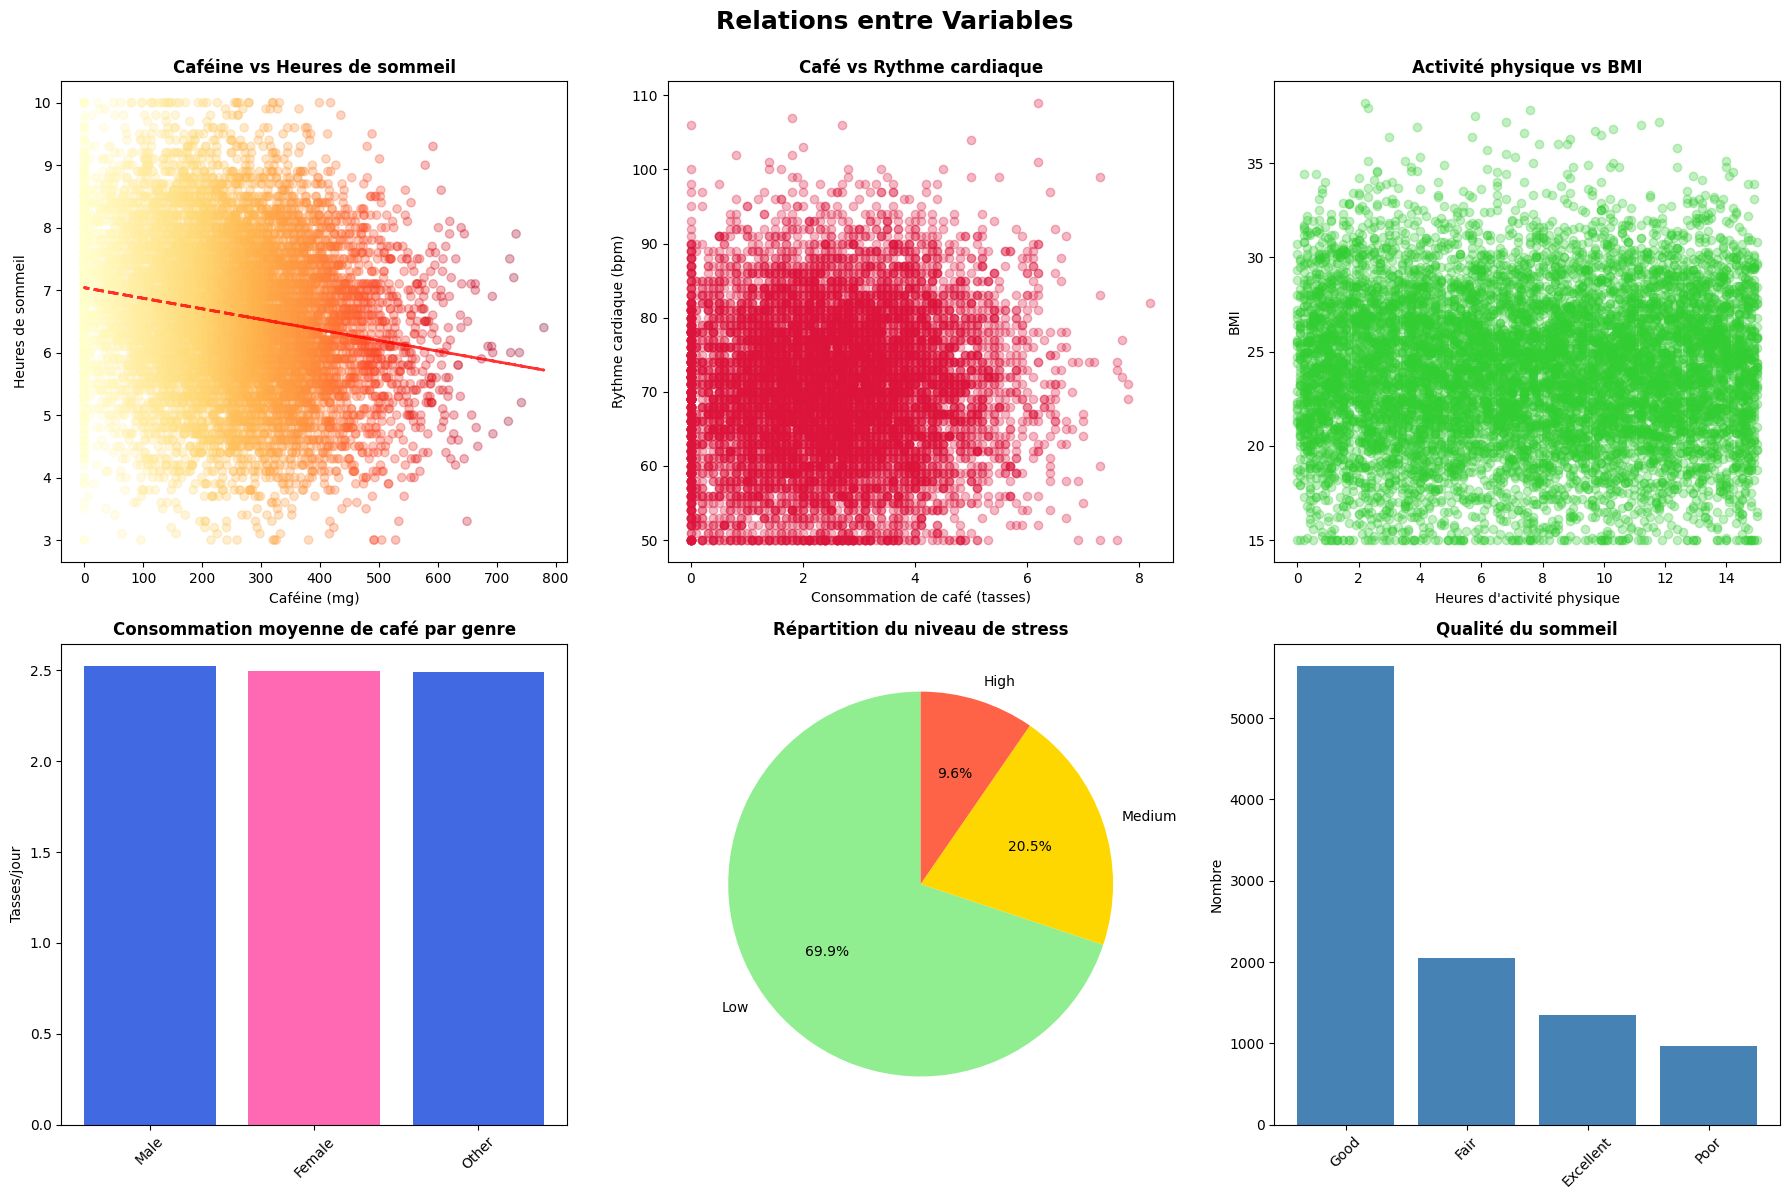

In [7]:
# Figure 2: Relations entre variables
fig2, axes = plt.subplots(2, 3, figsize=(18, 12))
fig2.suptitle('Relations entre Variables', fontsize=18, fontweight='bold', y=0.995)

# Caféine vs Sommeil
axes[0, 0].scatter(df['Caffeine_mg'], df['Sleep_Hours'], alpha=0.3, c=df['Coffee_Intake'], cmap='YlOrRd')
axes[0, 0].set_title('Caféine vs Heures de sommeil', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Caféine (mg)')
axes[0, 0].set_ylabel('Heures de sommeil')
z = np.polyfit(df['Caffeine_mg'], df['Sleep_Hours'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Caffeine_mg'], p(df['Caffeine_mg']), "r--", alpha=0.8, linewidth=2)

# Café vs Rythme cardiaque
axes[0, 1].scatter(df['Coffee_Intake'], df['Heart_Rate'], alpha=0.3, color='#DC143C')
axes[0, 1].set_title('Café vs Rythme cardiaque', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Consommation de café (tasses)')
axes[0, 1].set_ylabel('Rythme cardiaque (bpm)')

# Activité physique vs BMI
axes[0, 2].scatter(df['Physical_Activity_Hours'], df['BMI'], alpha=0.3, color='#32CD32')
axes[0, 2].set_title('Activité physique vs BMI', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Heures d\'activité physique')
axes[0, 2].set_ylabel('BMI')

# Genre vs Café
gender_coffee = df.groupby('Gender')['Coffee_Intake'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(gender_coffee)), gender_coffee.values, color=['#4169E1', '#FF69B4'])
axes[1, 0].set_xticks(range(len(gender_coffee)))
axes[1, 0].set_xticklabels(gender_coffee.index, rotation=45)
axes[1, 0].set_title('Consommation moyenne de café par genre', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Tasses/jour')

# Niveau de stress
stress_counts = df['Stress_Level'].value_counts()
colors_stress = ['#90EE90', '#FFD700', '#FF6347']
axes[1, 1].pie(stress_counts.values, labels=stress_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors_stress)
axes[1, 1].set_title('Répartition du niveau de stress', fontsize=12, fontweight='bold')

# Qualité du sommeil
sleep_quality = df['Sleep_Quality'].value_counts()
axes[1, 2].bar(range(len(sleep_quality)), sleep_quality.values, color='#4682B4')
axes[1, 2].set_xticks(range(len(sleep_quality)))
axes[1, 2].set_xticklabels(sleep_quality.index, rotation=45)
axes[1, 2].set_title('Qualité du sommeil', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Nombre')

plt.tight_layout()
plt.show()



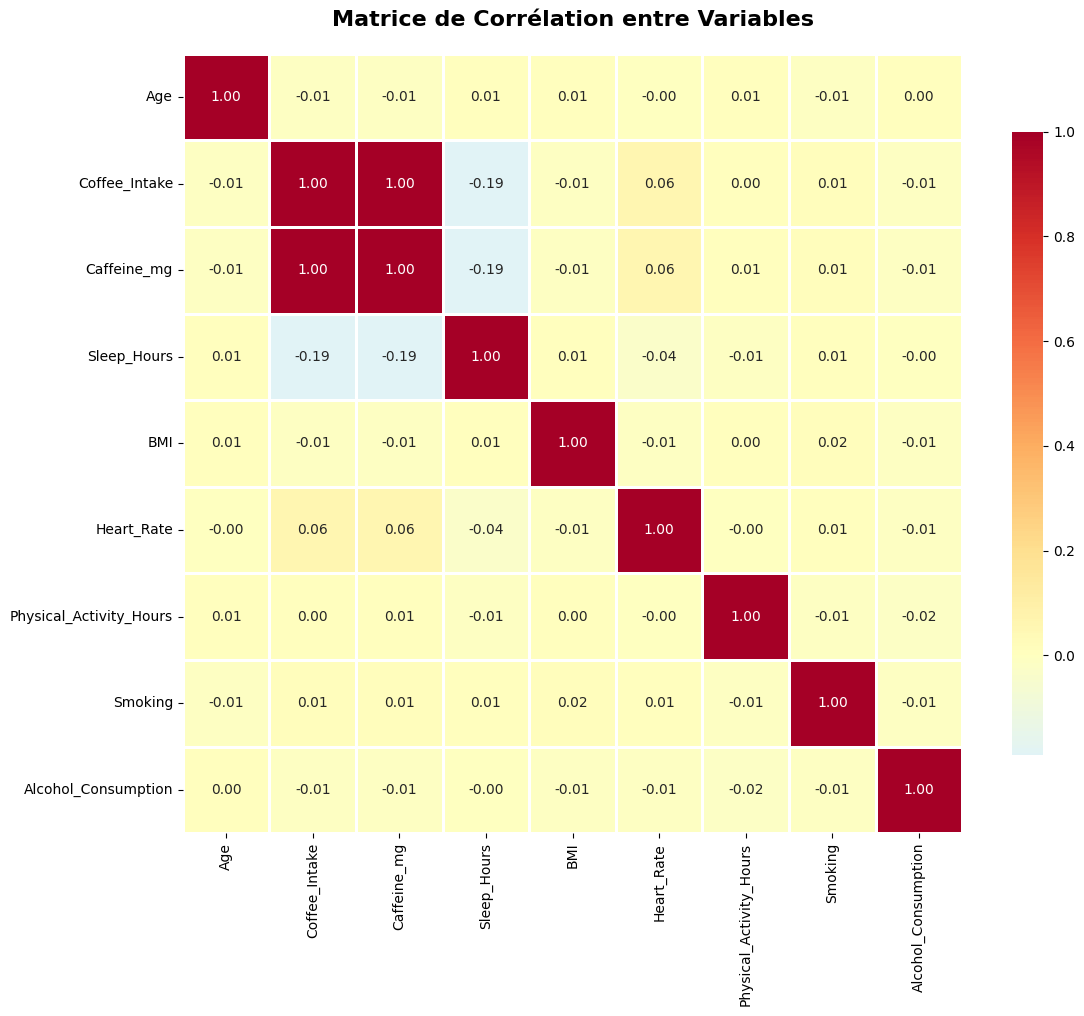

In [8]:

correlation_matrix = df[num_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation entre Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [9]:
print(f"   • Consommation moyenne de café: {df['Coffee_Intake'].mean():.2f} tasses/jour")
print(f"   • Caféine moyenne: {df['Caffeine_mg'].mean():.1f} mg")
print(f"   • Sommeil moyen: {df['Sleep_Hours'].mean():.2f} heures")
print(f"   • BMI moyen: {df['BMI'].mean():.2f}")
print(f"   • Âge moyen: {df['Age'].mean():.1f} ans")
print(f"   • Niveau de stress le plus fréquent: {df['Stress_Level'].mode()[0]}")

   • Consommation moyenne de café: 2.51 tasses/jour
   • Caféine moyenne: 238.4 mg
   • Sommeil moyen: 6.64 heures
   • BMI moyen: 23.99
   • Âge moyen: 34.9 ans
   • Niveau de stress le plus fréquent: Low


## 2. **Nettoyage et prétraitement**
Après l'étape d'exploration, nous allons procéder au prétraitement des données avant d'entraîner les modèles. Cette phase est essentielle pour obtenir des données propres, cohérentes et reproductibles qui seront nécessaires à la poursuite de notre analyse.


Nous avons des valeurs manquantes dans la colonne "Health Issues". Nos interprétons l'absence de données ici comme le fait que la personne n'a aucun problème de santé déclaré. Par conséquent, nous allons remplacer toutes ces valeurs manquantes par "None" pour rendre cette information utilisable par les modèles.

In [10]:
health_issues_counts = df['Health_Issues']
print(health_issues_counts.value_counts())
df["Health_Issues"] = df["Health_Issues"].fillna("None")

Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64


D'après l'analyse exploratoire, nous observons qu'il n'y a plus de valeurs manquantes, mais nous pouvons avoir un doute sur la présence de valeurs aberrantes que nous allons gérer maintenant.

In [11]:
def detect_outliers_iqr(df, column):
    """Détecte les outliers avec la méthode IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound



outlier_summary = []
for col in num_vars:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Variable': col,
        'Outliers': n_outliers,
        'Pourcentage': f"{(n_outliers/len(df)*100):.2f}%",
        'Limites': f"[{lower:.2f}, {upper:.2f}]"
    })
    print(f"  {col}: {n_outliers} outliers ({(n_outliers/len(df)*100):.2f}%)")

  Age: 25 outliers (0.25%)
  Coffee_Intake: 39 outliers (0.39%)
  Caffeine_mg: 39 outliers (0.39%)
  Sleep_Hours: 26 outliers (0.26%)
  BMI: 40 outliers (0.40%)
  Heart_Rate: 50 outliers (0.50%)
  Physical_Activity_Hours: 0 outliers (0.00%)
  Smoking: 2004 outliers (20.04%)
  Alcohol_Consumption: 0 outliers (0.00%)


Comme nous voyons que parmi 10 000 enregsitrements nous avons que 0.3 % des outliers dans les datasets donc on peut penser de les conserver. Nous allons effectuer un "Feature engineering" où nous allons créer des différentes variables qui seront intéressants à observer.

In [12]:
def add_age_groups(df):
    bins = [0, 18, 30, 45, 60, 120]
    labels = ["0-18", "19-30", "31-45", "46-60", "60+"]

    df = df.copy()
    df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)
    return df

df = add_age_groups(df)
continent_map = {
    'France':'Europe','Germany':'Europe','Spain':'Europe','Italy':'Europe',
    'USA':'America','Canada':'America','Brazil':'America','Mexico':'America',
    'Japan':'Asia','China':'Asia','India':'Asia','South Korea':'Asia',
    'Australia':'Oceania','New Zealand':'Oceania',
    'South Africa':'Africa','Morocco':'Africa','Egypt':'Africa'
}
df['Continent'] = df['Country'].map(continent_map).fillna('Other')




Nous avons ajouté deux nouvelles variables : "Continent" et "Groupe d'âge". Cela permettra de faciliter l'analyse ultérieure au lieu de prendre en compte tous les âges et les continents séparément.

## 3. Sélection des données 

Dans le cadre de la sélection des données, nous allons probablement retirer la colonne 'ID' (identifiant) et le pays car elle n'apporte aucune information utile ou pertinente pour l'analyse.

In [13]:
df.drop(columns=['ID', 'Country'], inplace=True)
df.head()

,Age,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Age_Group,Continent
0,40,Male,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0,31-45,Europe
1,33,Male,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0,31-45,Europe
2,42,Male,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,31-45,America
3,53,Male,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,46-60,Europe
4,32,Female,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,31-45,Europe


Afin d'éviter de futurs problèmes, nous allons encoder nos variables catégorielles sous forme numérique pour faciliter l'entraînement. Nous utiliserons un encodage ordinal (0, 1, 2, 3...) car la plupart de ces variables présentent une relation d'ordre, ce qui simplifiera grandement leur utilisation ultérieure.

In [17]:
from sklearn.preprocessing import LabelEncoder


# au cas où si on aurait besoin de l'original plus tard
original_df = df.copy()

sleep_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
stress_level_map = {'Low': 0, 'Medium': 1, 'High': 2}
health_issues_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}

df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)

label_encoders = {}
cat_vars = ['Gender', 'Continent', 'Sleep_Quality', 'Stress_Level',
            'Health_Issues', 'Occupation']

for col in cat_vars:
    if col not in ['Sleep_Quality', 'Stress_Level', 'Health_Issues']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

print("Mapping Sleep_Quality :", sleep_quality_map)
print("Mapping Stress_Level :", stress_level_map)
print("Mapping Health_Issues :", health_issues_map)

for col, le in label_encoders.items():
    print(f"\nMapping pour {col}:")
    for original, encoded in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {original} : {encoded}")


Mapping Sleep_Quality : {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
Mapping Stress_Level : {'Low': 0, 'Medium': 1, 'High': 2}
Mapping Health_Issues : {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}

Mapping pour Gender:
  Female : 0
  Male : 1
  Other : 2

Mapping pour Continent:
  America : 0
  Asia : 1
  Europe : 2
  Oceania : 3
  Other : 4

Mapping pour Occupation:
  Healthcare : 0
  Office : 1
  Other : 2
  Service : 3
  Student : 4


Avant de passer à l'étape suivante, nous pouvons observer le deséquilibre des données.

Distribution de Sleep_Quality:
  Good: 5637 (56.37%)
  Fair: 2050 (20.5%)
  Excellent: 1352 (13.52%)
  Poor: 961 (9.61%)


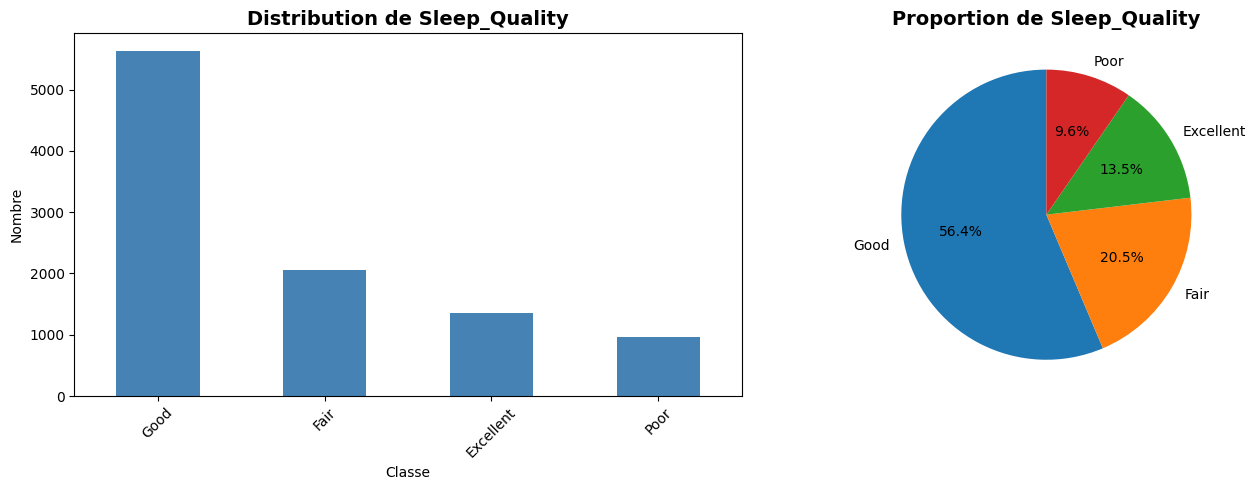


Ratio de déséquilibre: 5.87
Déséquilibre détecté! Recommandation: Appliquer SMOTE ou sous-échantillonnage


In [16]:
# Exemple avec Sleep_Quality comme variable cible
target_var = 'Sleep_Quality'
class_distribution = df[target_var].value_counts()
class_percentages = (class_distribution / len(df) * 100).round(2)

print(f"Distribution de {target_var}:")
for classe, count in class_distribution.items():
    print(f"  {classe}: {count} ({class_percentages[classe]}%)")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

class_distribution.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title(f'Distribution de {target_var}', fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre')
ax1.set_xlabel('Classe')
ax1.tick_params(axis='x', rotation=45)

class_percentages.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title(f'Proportion de {target_var}', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


max_class = class_percentages.max()
min_class = class_percentages.min()
imbalance_ratio = max_class / min_class

print(f"\nRatio de déséquilibre: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("Déséquilibre détecté! Recommandation: Appliquer SMOTE ou sous-échantillonnage")
else:
    print("Classes relativement équilibrées")

Prevoir un rechantillonage?

Nous verifions si les données sont desequilibres

## 4. Sélection du meilleur modèle:

Pour notre projet, nous n'analysons pas directement le niveau de stress et les problèmes de santé, mais nous cherchons à déterminer l'impact (ou l'issue) principal du stress et des problèmes de santé en examinant la qualité du sommeil, qui sera notre variable cible (ou variable à prédire).

Nous allons commencer par un train-test split en utilisant les données comme variables d’entraînement et la colonne de qualité du sommeil comme variable cible.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Sleep_Quality'])
y = df['Sleep_Quality']

# appliquer une répartition stratifiée car nos données sont déséquilibrées

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

Nous allons ensuite construire un pipeline afin d’automatiser la normalisation des données, l’entraînement des modèles et la définition des bonnes grilles de paramètres. Nous avons choisi d’utiliser des modèles de classification plutôt que des modèles de régression, car notre objectif est de prédire une classe. Trois approches seront donc évaluées :

- SVM, un classifieur performant et adapté aux jeux de données de taille moyenne.

- KNN, un modèle simple, non paramétrique et efficace, qui classe les instances selon la proximité de leurs voisins.

- MLP, un réseau de neurones adapté aux données tabulaires, contrairement aux CNN destinés aux images et aux RNN conçus pour les données séquentielles.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

pipelines = {
    "": Pipeline([
        ("scaler", MinMaxScaler),
        ("model", RandomForestClassifier())
    ]),
    "svm": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC())
    ]),
    "mlp": Pipeline([
        ("scaler", StandardScaler()),
        ("model", MLPClassifier(max_iter=300))
    ])
}

param_grids = {
    "randomforest": {
        "model__n_estimators": [100, 200, 300],      
        "model__max_depth": [None, 5, 10, 20],       
        "model__min_samples_split": [2, 5, 10],      
        "model__min_samples_leaf": [1, 2, 4],       
        "model__bootstrap": [True, False]            
    },
    "svm": {
        "model__C": [0.1, 1, 10],
        "model__kernel": ["rbf", "linear"]
    },
    "mlp": {
        "model__hidden_layer_sizes": [(50,), (100,), (50,50)],
        "model__activation": ["relu", "tanh"],
        "model__alpha": [0.0001, 0.001]
    }
}



Nous allons poursuivre par une boucl   un GridSearchCV qui combine Grid Search + Cross Validation sur chaque modèle

In [ ]:
from sklearn.model_selection import GridSearchCV

best_models = {}
best_scores = {}

for name in pipelines:
    print("Recherche modèle :", name)

    grid = GridSearchCV(
        estimator=pipelines[name],
        param_grid=param_grids[name],
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    
    print("Meilleurs paramètres :", grid.best_params_)
    print("Score CV :", grid.best_score_)
    print()


In [ ]:
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print("Meilleur modèle :", best_model_name)
